<H3>Raman curve fit:</H3>
curve fit with 3 lorentz peaks of G, D, G' for CSV text outputs obtained by LabRam HR-800 <br>
2021.08.10 ver.0.1 by fur.    curve fit with LMFIT and shows fitting curves.<br>
2021.08.10 ver.0.11 by fur.    Get G/D area ratio, and G/D height ratio <br>
2021.08.10 ver.0.12 by fur.   File chooser only works for jupyter notebook using ipyfilechooser <br>

<H4>References:<H4>
<OL>
    <LI>LMFIT, https://lmfit.github.io/lmfit-py/</LI>
    <LI>https://sabopy.com/py/lmfit-5/</LI>
    <LI>Multi peak fitting, emilyripka, https://github.com/emilyripka/BlogRepo/blob/master/181119_PeakFitting.ipynb</LI>
</OL>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
from lmfit.lineshapes import lorentzian
from lmfit.models import LinearModel, LorentzianModel

In [3]:
from ipyfilechooser import FileChooser

In [53]:
# Create and displays a FileChooser widget
cwd = os.getcwd()
fc = FileChooser(cwd)
display(fc)

FileChooser(path='/Users/fur/src/git/ramanfit', filename='', title='HTML(value='', layout=Layout(display='none…

In [264]:
#INFILE = "20210726MJ_MWI_28ul_std-D1.txt"

In [323]:
INFILE = fc.selected
INFILE

'/Users/fur/Library/CloudStorage/OneDrive-高知工科大学/work/experiment/raman/20220908/s4-180min_obj50d1.txt'

In [324]:
# with open(INFILE, "r") as f:
#     print(f.read())

In [325]:
data = np.loadtxt(INFILE, delimiter='\t')

In [326]:
print(data)

[[ 150.       672.09882]
 [ 150.13402  671.50562]
 [ 150.26805  671.5769 ]
 ...
 [3599.7319   675.29419]
 [3599.866    675.54645]
 [3600.       676.39258]]


In [327]:
x = data[:,0]
y = data[:,1]

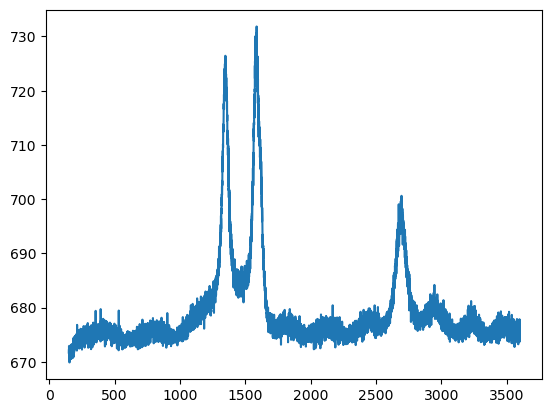

In [328]:
plt.plot(x,y);plt.show()

In [329]:
xDGindex1000=np.searchsorted(x,1000)

In [330]:
xDGindex2000=np.searchsorted(x,2000)

In [331]:
xDG = data[xDGindex1000:xDGindex2000,0]
yDG = data[xDGindex1000:xDGindex2000,1]

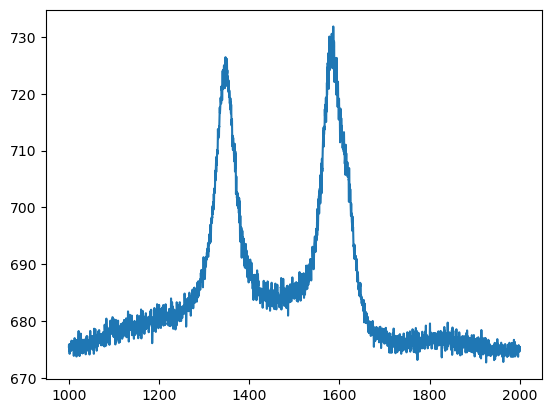

In [332]:
plt.plot(xDG,yDG);plt.show()

In [333]:
# LMFIT

In [334]:
bg = LinearModel(prefix='lin_')
pars = bg.guess(yDG, x=xDG)
#pars

In [335]:
lorentz1 = LorentzianModel(prefix='l1_')
#pars = lorentz1.guess(yDG, x=xDG)
pars.update(lorentz1.make_params())
pars['l1_center'].set(value=1336, min=1300, max=1380)
pars['l1_sigma'].set(value=10, min=5)
pars['l1_amplitude'].set(value=10000, min=5)
#pars

In [336]:
lorentz2 = LorentzianModel(prefix='l2_')
pars.update(lorentz2.make_params())

pars['l2_center'].set(value=1550, min=1500, max=1590)
pars['l2_sigma'].set(value=23, min=5)
pars['l2_amplitude'].set(value=15000, min=5)
#pars

In [337]:
lorentz3 = LorentzianModel(prefix='l3_')
pars.update(lorentz3.make_params())

pars['l3_center'].set(value=1603, min=1600, max=1650)
pars['l3_sigma'].set(value=10, min=5, max=100)
pars['l3_amplitude'].set(value=2000, min=5)
pars

name,value,initial value,min,max,vary,expression
lin_slope,-0.00541861,None,-inf,inf,True,
lin_intercept,692.929347,None,-inf,inf,True,
l1_amplitude,10000.0000,None,5.00000000,inf,True,
l1_center,1336.00000,None,1300.00000,1380.00000,True,
l1_sigma,10.0000000,None,5.00000000,inf,True,
l1_fwhm,20.0000000,None,-inf,inf,False,2.0000000*l1_sigma
l1_height,318.309900,None,-inf,inf,False,"0.3183099*l1_amplitude/max(1e-15, l1_sigma)"
l2_amplitude,15000.0000,None,5.00000000,inf,True,
l2_center,1550.00000,None,1500.00000,1590.00000,True,
l2_sigma,23.0000000,None,5.00000000,inf,True,


In [338]:
mod = lorentz1 + lorentz2 + lorentz3 + bg
init = mod.eval(pars, x=xDG)
out = mod.fit(yDG, pars, x=xDG)

In [339]:
print(out.fit_report())

[[Model]]
    (((Model(lorentzian, prefix='l1_') + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_')) + Model(linear, prefix='lin_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 390
    # data points      = 7461
    # variables        = 11
    chi-square         = 18133.7211
    reduced chi-square = 2.43405653
    Akaike info crit   = 6647.99322
    Bayesian info crit = 6724.08511
[[Variables]]
    lin_slope:     -0.00279217 +/- 6.7105e-05 (2.40%) (init = -0.005418605)
    lin_intercept:  680.342502 +/- 0.10617732 (0.02%) (init = 692.9293)
    l1_amplitude:   4274.33376 +/- 14.2420275 (0.33%) (init = 10000)
    l1_center:      1347.76923 +/- 0.07687937 (0.01%) (init = 1336)
    l1_sigma:       29.6915471 +/- 0.12331603 (0.42%) (init = 10)
    l1_fwhm:        59.3830942 +/- 0.24663206 (0.42%) == '2.0000000*l1_sigma'
    l1_height:      45.8232354 +/- 0.11871649 (0.26%) == '0.3183099*l1_amplitude/max(1e-15, l1_sigma)'
    l2_amplitude:   

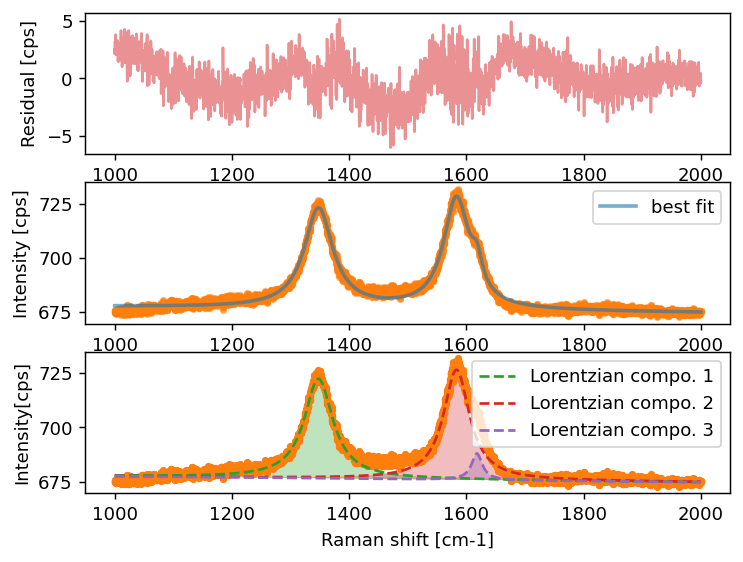

In [340]:
fig, ax = plt.subplots(3,1,dpi=130)
ax=ax.ravel()

ax[0].plot(xDG, out.best_fit - yDG, 'C3-', alpha=0.5)

ax[1].plot(xDG, yDG, 'C1.',alpha=0.5)
ax[1].plot(xDG, out.best_fit, '-', label='best fit',zorder=10,lw=2, alpha=0.6)

ax[2].plot(xDG, yDG, 'C1.')
comps = out.eval_components(x=xDG)
ax[2].plot(xDG, comps['l1_']+comps['lin_'], 'C2--', label='Lorentzian compo. 1')
ax[2].fill_between(xDG, comps['l1_']+comps['lin_'], comps['lin_'],facecolor='C2',alpha=0.3)
ax[2].plot(xDG, comps['l2_']+comps['lin_'], 'C3--', label='Lorentzian compo. 2')
ax[2].fill_between(xDG, comps['l2_']+comps['lin_'], comps['lin_'],facecolor='C3',alpha=0.3)
ax[2].plot(xDG, comps['l3_']+comps['lin_'], 'C4--', label='Lorentzian compo. 3')
ax[2].fill_between(xDG, comps['l3_']+comps['lin_'], comps['lin_'],facecolor='C4',alpha=0.3)

ax[0].set(xlabel="",ylabel="Residual [cps]")
ax[1].set(xlabel="",ylabel="Intensity [cps]")
ax[2].set(xlabel="Raman shift [cm-1]",ylabel="Intensity[cps]")
ax[1].legend(loc='best')
ax[2].legend(loc='best')

plt.savefig("ramfit.png",dpi=130)
plt.show()

In [341]:
for parname, param in out.params.items():
    print("%s = %f +/- %f " % (parname, param.value, param.stderr))

lin_slope = -0.002792 +/- 0.000067 
lin_intercept = 680.342502 +/- 0.106177 
l1_amplitude = 4274.333760 +/- 14.242027 
l1_center = 1347.769229 +/- 0.076879 
l1_sigma = 29.691547 +/- 0.123316 
l1_fwhm = 59.383094 +/- 0.246632 
l1_height = 45.823235 +/- 0.118716 
l2_amplitude = 4283.653337 +/- 28.698160 
l2_center = 1583.068956 +/- 0.127617 
l2_sigma = 26.929891 +/- 0.157148 
l2_fwhm = 53.859782 +/- 0.314296 
l2_height = 50.632558 +/- 0.157515 
l3_amplitude = 423.696569 +/- 19.583019 
l3_center = 1617.963176 +/- 0.212747 
l3_sigma = 11.105579 +/- 0.425374 
l3_fwhm = 22.211157 +/- 0.850747 
l3_height = 12.144060 +/- 0.255974 


In [342]:
vd = out.params.valuesdict()

In [343]:
#vd

In [344]:
l2_area = np.pi * vd['l2_amplitude'] * vd['l2_fwhm']

In [345]:
l1_area = np.pi * vd['l1_amplitude'] * vd['l1_fwhm']

In [346]:
GDAreaRatio = l2_area / l1_area

In [347]:
GDAreaRatio

0.9089660330075342

In [348]:
l1_height = vd['l1_height']

In [349]:
l2_height = vd['l2_height']

In [350]:
GDHeightRatio = l2_height / l1_height

In [351]:
GDHeightRatio

1.1049537974126